# NLP

## Get helper functions and data
```
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
```
```
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys
```
```
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")
```


## import json

```
df = pd.read_json('data/simple.json')
```


```
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/simple.json'
df = pd.read_json(URL)
```
```
import json
# load data using Python JSON module
with open('data/nested_array.json','r') as f:
    data = json.loads(f.read())

# Flatten data
df_nested_list = pd.json_normalize(data, record_path =['students'])

# To include school_name and class
df_nested_list = pd.json_normalize(
    data,
    record_path =['students'],
    meta=['school_name', 'class']
)

```


## Visualizing a text dataset
```
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()
```
```
	id	keyword	location	text	target
0	1	NaN	NaN	Our Deeds are the Reason of this #earthquake M...	1
1	4	NaN	NaN	Forest fire near La Ronge Sask. Canada	1
2	5	NaN	NaN	All residents asked to 'shelter in place' are ...	1
3	6	NaN	NaN	13,000 people receive #wildfires evacuation or...	1
4	7	NaN	NaN	Just got sent this photo from Ruby #Alaska as ...	1
```
```
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()
```
```
	id	keyword	location	text	target
2644	3796	destruction	NaN	So you have a new weapon that can cause un-ima...	1
2227	3185	deluge	NaN	The f$&amp;@ing things I do for #GISHWHES Just...	0
5448	7769	police	UK	DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...	1
132	191	aftershock	NaN	Aftershock back to school kick off was great. ...	0
6845	9810	trauma	Montgomery County, MD	in response to trauma Children of Addicts deve...	0
```

## How many examples of each class?
```
train_df.target.value_counts()
```
```
0    4342
1    3271
Name: target, dtype: int64
```
```
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")
```
```
Total training samples: 7613
Total test samples: 3263
Total samples: 10876
```

## Visualize some random examples
```
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")
```
```
Target: 0 (not real disaster)
Text:
@JamesMelville Some old testimony of weapons used to promote conflicts
Tactics - corruption &amp; infiltration of groups
https://t.co/cyU8zxw1oH

---

Target: 1 (real disaster)
Text:
Now Trending in Nigeria: Police charge traditional ruler others with informantÛªs  murder http://t.co/93inFxzhX0

---

Target: 1 (real disaster)
Text:
REPORTED: HIT &amp; RUN-IN ROADWAY-PROPERTY DAMAGE at 15901 STATESVILLE RD

---

Target: 1 (real disaster)
Text:
ohH NO FUKURODANI DIDN'T SURVIVE THE APOCALYPSE BOKUTO FEELS HORRIBLE  my poor boy my ppor child

---

Target: 1 (real disaster)
Text:
Maryland mansion fire that killed 6 caused by damaged plug under Christmas tree report says - Into the flames: Firefighter's bravery...

---
```

## Split data into training and validation sets
```
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility
```

```
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)
```
```
# View the first 10 training sentences and their labels

train_sentences[:10], train_labels[:10]
```
```
(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]))
 ```

## Text Vectorization
```
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None
```
```
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15
```
```
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)
```
```
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)
```

### Get the unique words in the vocabulary
```
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


```


## Embedding
```
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding
```
```
<keras.layers.core.embedding.Embedding at 0x7f0c118dcc40>
```
```
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Now on #ComDev #Asia: Radio stations in #Bangladesh broadcasting #programs ?to address the upcoming cyclone #komen http://t.co/iOVr4yMLKp      

Embedded version:
<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04868475, -0.03902867, -0.01375594, ...,  0.01682534,
         -0.0439401 , -0.04604518],
        [-0.04827927, -0.00328457,  0.02171678, ..., -0.03261749,
         -0.01061803, -0.0481179 ],
        [-0.02431345,  0.01104342,  0.00933889, ..., -0.04607272,
         -0.00651377,  0.03853123],
        ...,
        [-0.03270339,  0.03608486,  0.03573406, ...,  0.03622421,
          0.03427652, -0.03483479],
        [-0.0489977 ,  0.01962234,  0.02186165, ...,  0.03139002,
         -0.00744159,  0.0428594 ],
        [ 0.01265842,  0.02462569, -0.04731182, ...,  0.00403734,
          0.0431679 ,  0.03959754]]], dtype=float32)>
```
Each token in the sentence gets turned into a length 128 feature vector.
```
# Check out a single token's embedding
sample_embed[0][0]
```
```
<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04868475, -0.03902867, -0.01375594,  0.01587117, -0.02964617,
        0.00738639, -0.03109504,  0.03008839, -0.01458266, -0.03069887,
       -0.04926676, -0.03454053, -0.04019499, -0.04406711,  0.01975099,
        0.02852687, -0.04052209, -0.03800124,  0.03438697, -0.0118026 ,
       -0.03470664, -0.01146972,  0.0449667 , -0.00269016,  0.02131964,
       -0.04141569, -0.03724197,  0.01624352,  0.03269556,  0.03813741,
        0.03606123,  0.00698509, -0.03569689,  0.02056131, -0.03467314,
        0.01110398,  0.02095172,  0.02219674, -0.04576088, -0.04229112,
       -0.02345047,  0.02578488,  0.02985479, -0.00203061,  0.03920727,
        0.04065951,  0.03973453,  0.03947322,  0.01699554,  0.0021927 ,
        0.03676197, -0.04327145,  0.02495482,  0.02447238, -0.04413594,
       -0.01388069, -0.00375951, -0.0328602 , -0.00067427,  0.01808068,
        0.04227355,  0.02817165,  0.01965401, -0.01514393,  0.01905935,
       -0.03820103, -0.04916845,  0.02303007,  0.00830983,  0.01011454,
       -0.04043181,  0.02080727, -0.03319015,  0.04188809, -0.01183917,
       -0.01822531, -0.02172413,  0.03059311,  0.02727925, -0.00328885,
       -0.00808424, -0.02095444, -0.00894216,  0.00770078, -0.00439024,
        0.03637768,  0.02007255, -0.02650907, -0.01374531,  0.01806785,
       -0.03309877, -0.01076321, -0.04107616,  0.01709371,  0.04567242,
       -0.01824218,  0.02805582,  0.02974418, -0.04001283, -0.04077357,
        0.00323737,  0.04038842, -0.00992844, -0.03974843,  0.04533138,
        0.04738795,  0.02837384,  0.03874009, -0.01673441, -0.00258055,
       -0.01975214, -0.04166807, -0.02483889, -0.02804886,  0.04608755,
        0.03544754,  0.02697959,  0.00242041,  0.00101637, -0.01162767,
       -0.00497937,  0.00540714, -0.01258825,  0.00779672,  0.02742722,
        0.01682534, -0.0439401 , -0.04604518], dtype=float32)>
```


## Model 0: Getting a baseline
```
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)
```
```
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%

```
```
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

```
```
array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])
```

## Create an Evaluation Function
```
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results
```
```
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results
```
```
{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}
```

## Model 1: A simple dense model
```
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"
```
```
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model
```
```
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
```
```
# Get a summary of the model
model_1.summary()
```
```
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])
```
```
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7861
[0.4760194718837738, 0.7860892415046692]

```
```
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.01078545,  0.05590528,  0.03125916, ..., -0.0312557 ,
         -0.05340781, -0.03800201],
        [-0.02370532,  0.01161508,  0.0097667 , ..., -0.04962142,
         -0.00636482,  0.03781125],
        [-0.05472897,  0.05356752,  0.02146765, ...,  0.05501205,
          0.01705659, -0.05321405],
        ...,
        [ 0.01756669, -0.03676652, -0.00949616, ..., -0.00987446,
         -0.04183743,  0.03016822],
        [-0.07823883,  0.06081628, -0.07657789, ...,  0.07998865,
         -0.05281445, -0.02332675],
        [-0.03393482,  0.08871375, -0.06819566, ...,  0.06992952,
         -0.09992232, -0.02705033]], dtype=float32)>]
```
```
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)
```

### Upload to tensorboard
```
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "First deep model on text data" \
#   --description "Trying a dense model with an embedding layer" \
#   --one_shot # exits the uploader when upload has finished
```
```
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE
```

### Make predictions (these come back in the form of probabilities)
Since our final layer uses a sigmoid activation function, we get our predictions back in the form of probabilities.

To convert them to prediction classes, we'll use tf.round(), meaning prediction probabilities below 0.5 will be rounded to 0 and those above 0.5 will be rounded to 1.

🔑 Note: In practice, the output threshold of a sigmoid prediction probability doesn't necessarily have to 0.5. For example, through testing, you may find that a cut off of 0.25 is better for your chosen evaluation metrics. A common example of this threshold cutoff is the precision-recall tradeoff (search for the keyword "tradeoff" to learn about the phenomenon).

```
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities
```
```
24/24 [==============================] - 0s 2ms/step
array([[0.4068562 ],
       [0.74714756],
       [0.9978309 ],
       [0.10913013],
       [0.10925023],
       [0.93645686],
       [0.91428435],
       [0.99250424],
       [0.96829313],
       [0.26842445]], dtype=float32)
```
```
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

```
```
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results
```
```
{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}
```
```
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False]
```

### Create a helper function to compare our baseline results to new model results
```
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)
```
```
Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00
```

### Visualize Learned Embeddings
```
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])
```
```
# Get the weight matrix of embedding layer
# (these are the  patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]numerical
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)

```
```
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0:
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")
```

Once you've downloaded the embedding vectors and metadata, you can visualize them using Embedding Vector tool:

Go to http://projector.tensorflow.org/
Click on "Load data"
Upload the two files you downloaded (embedding_vectors.tsv and embedding_metadata.tsv)
Explore
Optional: You can share the data you've created by clicking "Publish"


## RNN's

### Model 2: LSTM

Our model is going to take on a very similar structure to `model_1`:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

The main difference will be that we're going to add an LSTM layer between our embedding and output.

And to make sure we're not getting reusing trained embeddings (this would involve data leakage between models, leading to an uneven comparison later on), we'll create another embedding layer (`model_2_embedding`) for our model. The `text_vectorizer` layer can be reused since it doesn't get updated during training.

> 🔑 **Note:** The reason we use a new embedding layer for each model is since the embedding layer is a *learned* representation of words (as numbers), if we were to use the same embedding layer (`embedding_1`) for each model, we'd be mixing what one model learned with the next. And because we want to compare our models later on, starting them with their own embedding layer each time is a better idea.

```
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)

```
```
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
```
```
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])
```
```
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 2ms/step
((762, 1),
 array([[0.00630066],
        [0.7862389 ],
        [0.9991792 ],
        [0.06841089],
        [0.00448257],
        [0.99932086],
        [0.8617405 ],
        [0.99968505],
        [0.9993248 ],
        [0.57989997]], dtype=float32))
```
```
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]
```
```
<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>
```
```
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results
```
```
{'accuracy': 75.59055118110236,
 'precision': 0.7567160722556739,
 'recall': 0.7559055118110236,
 'f1': 0.7539595513230887}
 ```
```
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)
```
```
Baseline accuracy: 79.27, New accuracy: 75.59, Difference: -3.67
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03
```

### Model 3: GRU
```
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")
```
```
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
```
```
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])
```
```
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step
((762, 1),
 array([[0.31703022],
        [0.9160779 ],
        [0.9977792 ],
        [0.14830083],
        [0.01086212],
        [0.9908326 ],
        [0.6938264 ],
        [0.9978917 ],
        [0.99662066],
        [0.4299642 ]], dtype=float32))
```
```
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>
```
```
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results
```
```
{'accuracy': 77.55905511811024,
 'precision': 0.776326889347514,
 'recall': 0.7755905511811023,
 'f1': 0.7740902496040959}
```
```
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)
```
```
Baseline accuracy: 79.27, New accuracy: 77.56, Difference: -1.71
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01

```




### Model 4: Bidirectional RNN model



```
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")
```
```
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
```
```
# Get a summary of our bidirectional model
model_4.summary()
```
```
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])
```
```
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]
```
```
24/24 [==============================] - 1s 3ms/step
array([[0.05258294],
       [0.8495521 ],
       [0.99898857],
       [0.15441437],
       [0.00566462],
       [0.99576193],
       [0.952807  ],
       [0.9993511 ],
       [0.99936384],
       [0.19425693]], dtype=float32)
```
```
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>
```
```
Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results
```
```
{'accuracy': 76.77165354330708,
 'precision': 0.7675450859410361,
 'recall': 0.7677165354330708,
 'f1': 0.7667932666650168}
```
```
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)
```
```
Baseline accuracy: 79.27, New accuracy: 76.77, Difference: -2.49
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02
```




## Convolutional Neural Networks for Text

### Model 5: Conv1D
```
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()
```
```
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])
```
```
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]
```
```
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]
```
```
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results
```
```
{'accuracy': 78.74015748031496,
 'precision': 0.7900609457201325,
 'recall': 0.7874015748031497,
 'f1': 0.7852275674790494}
```
```
# Compare model_5 results to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)
```
```
Baseline accuracy: 79.27, New accuracy: 78.74, Difference: -0.52
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.79, Difference: -0.00
```

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.

Our embedding layer also outputs an a 128 dimensional vector for each word, where as, the Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-USE-tensorflow-hub-encoder-decoder-model.png)
*The feature extractor model we're building through the eyes of an **encoder/decoder** model.*

> 🔑 **Note:** An **encoder** is the name for a model which converts raw data such as text into a numerical representation (feature vector), a **decoder** converts the numerical representation to a desired output.

As usual, this is best demonstrated with an example.

We can load in a TensorFlow Hub module using the [`hub.load()`](https://www.tensorflow.org/hub/api_docs/python/hub/load) method and passing it the target URL of the module we'd like to use, in our case, it's "https://tfhub.dev/google/universal-sentence-encoder/4".

Let's load the Universal Sentence Encoder model and test it on a couple of sentences.
```
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])
tf.Tensor(
[-0.01154496  0.02487099  0.0287963  -0.01272263  0.03969951  0.08829075
  0.02682647  0.05582222 -0.01078761 -0.00596655  0.00640638 -0.01816132
  0.0002885   0.09106605  0.05874373 -0.03175148  0.01510153 -0.05164852
  0.0099434  -0.06867751 -0.04210396  0.0267539   0.03008907  0.00320448
 -0.00336865 -0.04790529  0.02267517 -0.00984557 -0.04066692 -0.01285528
 -0.04665243  0.05630673 -0.03952145  0.00521895  0.02495948 -0.07011835
  0.02873133  0.04945794 -0.00634555 -0.08959357  0.02807156 -0.00809173
 -0.01363956  0.05998395 -0.1036155  -0.05192674  0.00232459 -0.02326531
 -0.03752431  0.0333298 ], shape=(50,), dtype=float32)

# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape
TensorShape([512])
```


```
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")
```
```
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()
```
```
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])
```
```
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]
```
```
24/24 [==============================] - 1s 7ms/step
array([[0.14814094],
       [0.74057853],
       [0.9886474 ],
       [0.22455953],
       [0.7404941 ],
       [0.6678845 ],
       [0.98305696],
       [0.9746391 ],
       [0.923527  ],
       [0.08624077]], dtype=float32)
```
```
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>
```
```
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results
```
```
{'accuracy': 81.75853018372703,
 'precision': 0.8206021490415145,
 'recall': 0.8175853018372703,
 'f1': 0.8158792847350168}
```
```
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)
```
```
Baseline accuracy: 79.27, New accuracy: 81.76, Difference: 2.49
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.02
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03
```


## Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

One of the benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).

To put this to the test, we're going to make a small subset of the training data (10%), train a model and evaluate it.

```
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686
```

```
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()
```
```
0    415
1    271
dtype: int64
```
```
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()
```
```
Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 USE (KerasLayer)            (None, 512)               256797824
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
=================================================================
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
```
```
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])
```
```
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]
```
```
24/24 [==============================] - 1s 7ms/step
array([[0.24178001],
       [0.8116845 ],
       [0.91511923],
       [0.32094172],
       [0.587357  ],
       [0.82938445],
       [0.8401675 ],
       [0.8496708 ],
       [0.8371127 ],
       [0.14010696]], dtype=float32)
```
```
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]
```
```
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results
```
```
{'accuracy': 77.03412073490814,
 'precision': 0.7760118694840564,
 'recall': 0.7703412073490814,
 'f1': 0.7665375100103654}
```
```
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)
```
```
Baseline accuracy: 79.27, New accuracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.78, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02
```

##  Combine model results into a DataFrame
```
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results
```
```
accuracy	precision	recall	f1
baseline	79.265092	0.811139	0.792651	0.786219
simple_dense	78.608924	0.790328	0.786089	0.783297
lstm	75.590551	0.756716	0.755906	0.753960
gru	77.559055	0.776327	0.775591	0.774090
bidirectional	76.771654	0.767545	0.767717	0.766793
conv1d	78.740157	0.790061	0.787402	0.785228
tf_hub_sentence_encoder	81.758530	0.820602	0.817585	0.815879
tf_hub_10_percent_data	77.034121	0.776012	0.770341	0.766538
```
```
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
```
```
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));
```
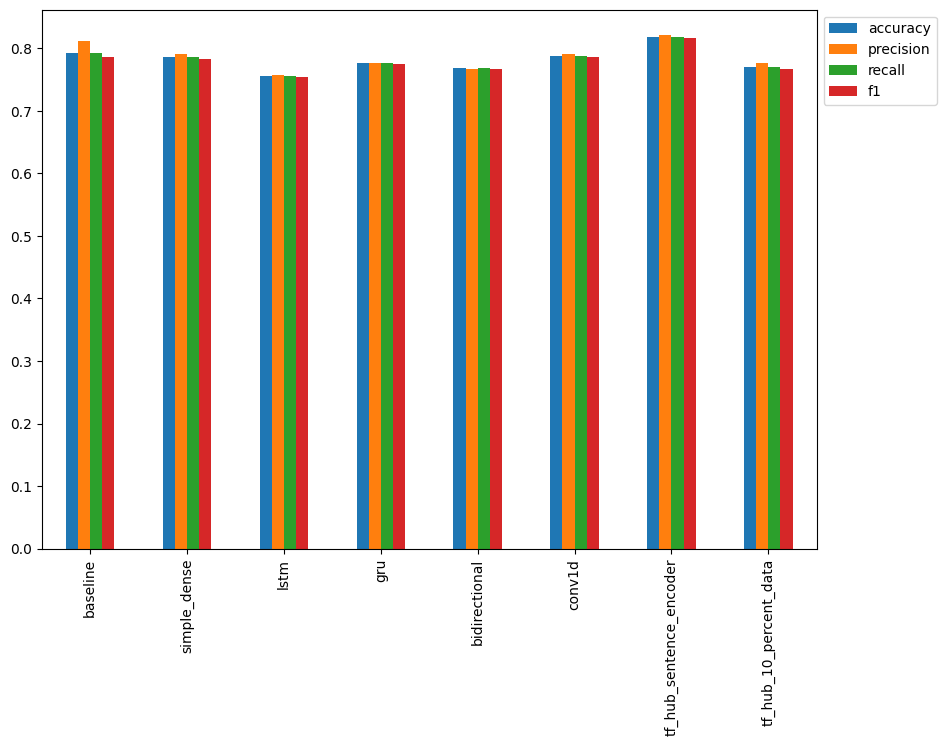

## Sort model results by f1-score
```
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));
```

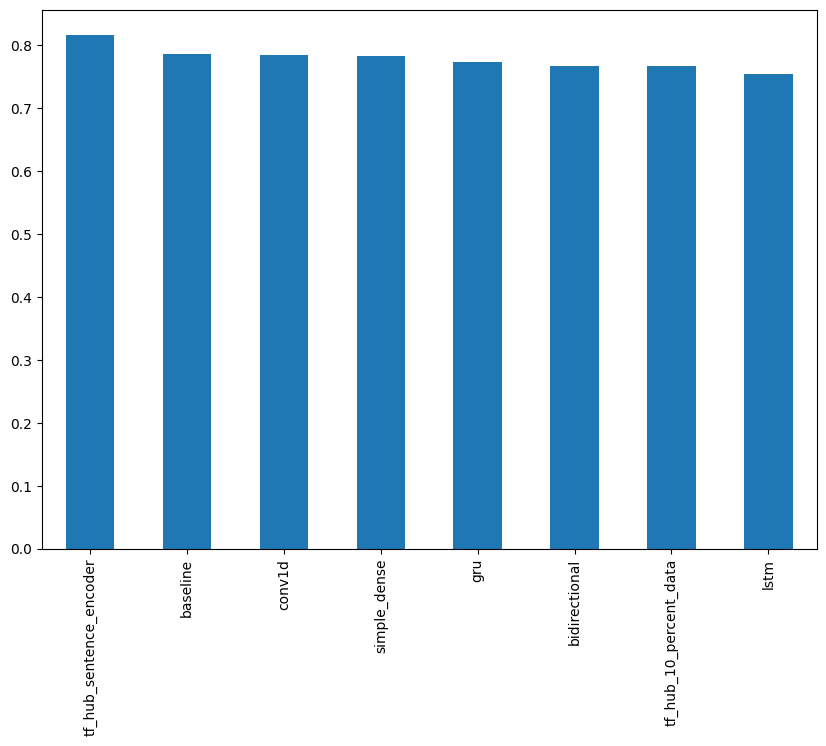




## Combining our models (model ensembling/stacking)

## Get mean pred probs for 3 models
```
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]
```
```
<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>
```
```
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results
```
```
{'accuracy': 77.95275590551181,
 'precision': 0.7792442137914578,
 'recall': 0.7795275590551181,
 'f1': 0.7789463852322546}
```
```
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results
```
```
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100
```
```
all_model_results

          accuracy	 precision	 recall	    f1
baseline	0.792651	0.811139	0.792651	0.786219
simple_dense	0.786089	0.790328	0.786089	0.783297
lstm	0.755906	0.756716	0.755906	0.753960
gru	0.775591	0.776327	0.775591	0.774090
bidirectional	0.767717	0.767545	0.767717	0.766793
conv1d	0.787402	0.790061	0.787402	0.785228
tf_hub_sentence_encoder	0.817585	0.820602	0.817585	0.815879
tf_hub_10_percent_data	0.770341	0.776012	0.770341	0.766538
ensemble_results	0.779528	0.779244	0.779528	0.778946

```


## Finding the most wrong examples
```
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()
```
```
text	target	pred	pred_prob
0	DFR EP016 Monthly Meltdown - On Dnbheaven 2015...	0	0.0	0.148141
1	FedEx no longer to transport bioterror germs i...	0	1.0	0.740579
2	Gunmen kill four in El Salvador bus attack: Su...	1	1.0	0.988647
3	@camilacabello97 Internally and externally scr...	1	0.0	0.224560
4	Radiation emergency #preparedness starts with ...	1	1.0	0.740494
```
```
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]
```
```

text	target	pred	pred_prob
31	? High Skies - Burning Buildings ? http://t.co...	0	1.0	0.906832
628	@noah_anyname That's where the concentration c...	0	1.0	0.866348
759	FedEx will no longer transport bioterror patho...	0	1.0	0.859502
393	@SonofLiberty357 all illuminated by the bright...	0	1.0	0.855963
49	@madonnamking RSPCA site multiple 7 story high...	0	1.0	0.839930
209	Ashes 2015: AustraliaÛªs collapse at Trent Br...	0	1.0	0.815515
251	@AshGhebranious civil rights continued in the ...	0	1.0	0.807973
109	[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...	0	1.0	0.806746
698	åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...	0	1.0	0.782425
695	A look at state actions a year after Ferguson'...	0	1.0	0.759534
```
```
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")
```
```
Target: 0, Pred: 1, Prob: 0.9068315625190735
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8663479685783386
Text:
@noah_anyname That's where the concentration camps and mass murder come in.

EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.859502375125885
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8559632897377014
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8399295806884766
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8155148029327393
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.8079732060432434
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1, Prob: 0.8067457675933838
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

Target: 0, Pred: 1, Prob: 0.7824245095252991
Text:
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent Collapse Story: Correction: Tent Collapse story åÈ http://t.co/fDJUYvZMrv @wizkidayo

----

Target: 0, Pred: 1, Prob: 0.7595335841178894
Text:
A look at state actions a year after Ferguson's upheaval http://t.co/GZEkQWzijq

----
```
```
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")
```
```
Target: 1, Pred: 0, Prob: 0.06247330829501152
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.05949299782514572
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob: 0.056083984673023224
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.055036477744579315
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.054454777389764786
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.046157706528902054
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.03960023820400238
Text:
Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy

----

Target: 1, Pred: 0, Prob: 0.03830057382583618
Text:
Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube

----

Target: 1, Pred: 0, Prob: 0.03802212327718735
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0, Prob: 0.03466600552201271
Text:
Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP

----
```

## Making predictions on the test dataset
```
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")
```
```
1/1 [==============================] - 0s 79ms/step
Pred: 0, Prob: 0.05416637659072876
Text:
WHAT a day's cricket that was. Has destroyed any plans I had for exercise today.

----

1/1 [==============================] - 0s 39ms/step
Pred: 1, Prob: 0.5330829620361328
Text:
Any other generation this would've been fatality  http://t.co/zcCtZM9f0o

----

1/1 [==============================] - 0s 40ms/step
Pred: 1, Prob: 0.9940084218978882
Text:
Arson suspect linked to 30 fires caught in Northern California http://t.co/HkFPyNb4PS

----

1/1 [==============================] - 0s 40ms/step
Pred: 1, Prob: 0.9726524353027344
Text:
Help support the victims of the Japanese Earthquake and Pacific Tsunami http://t.co/O5GbPBQH http://t.co/MN5wnxf0 #hope4japan #pray4japan

----

1/1 [==============================] - 0s 40ms/step
Pred: 0, Prob: 0.36651405692100525
Text:
this is from my show last night and im still panicking over the fact i saw sweaty ashton with my own two eyes http://t.co/yyJ76WBC9y

----

1/1 [==============================] - 0s 41ms/step
Pred: 0, Prob: 0.42949625849723816
Text:
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam

----

1/1 [==============================] - 0s 41ms/step
Pred: 1, Prob: 0.7450974583625793
Text:
Jane Kelsey on the FIRE Economy
5th Aug 5:30ÛÒ7:30pm
Old Govt Buildings Wgton
The context &amp; the driver for #TPP and #TRADEinSERVICESAgreement

----

1/1 [==============================] - 0s 41ms/step
Pred: 0, Prob: 0.13024944067001343
Text:
Detonation fashionable mountaineering electronic watch water-resistant couples leisure tabÛ_ http://t.co/GH48B54riS http://t.co/2PqTm06Lid

----

1/1 [==============================] - 0s 41ms/step
Pred: 1, Prob: 0.8552481532096863
Text:
@AlbertBrooks Don't like the Ayatollah Khomeini Memorial Nuclear Reactor for the Annihilation of Israel? Racist!

----

1/1 [==============================] - 0s 40ms/step
Pred: 0, Prob: 0.06269928067922592
Text:
Can you imagine how traumatised Makoto would be if he could see himself in the dub (aka Jersey Shore AU) rn? Well done America
```

## Function to make predictions
```
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")
```
```
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=daniels_tweet)
```
```
1/1 [==============================] - 0s 39ms/step
Pred: 0.0 (not real disaster) Prob: 0.044768452644348145
Text:
Life like an ensemble: take the best choices from others and make your own
```
```
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"
```
```
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)
```
```
1/1 [==============================] - 0s 42ms/step
Pred: 1.0 (real disaster) Prob: 0.9650391936302185
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon
```
```
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)
```
```
1/1 [==============================] - 0s 40ms/step
Pred: 1.0 (real disaster) Prob: 0.9686568379402161
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon
```


## Calculate the time of predictions

```
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred
```
```
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred
```
```
24/24 [==============================] - 0s 7ms/step
(0.2243557769999711, 0.0002944301535432692)
```
```
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred
```
```
(0.013254724999967493, 1.739465223092847e-05)
```
```
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");
```
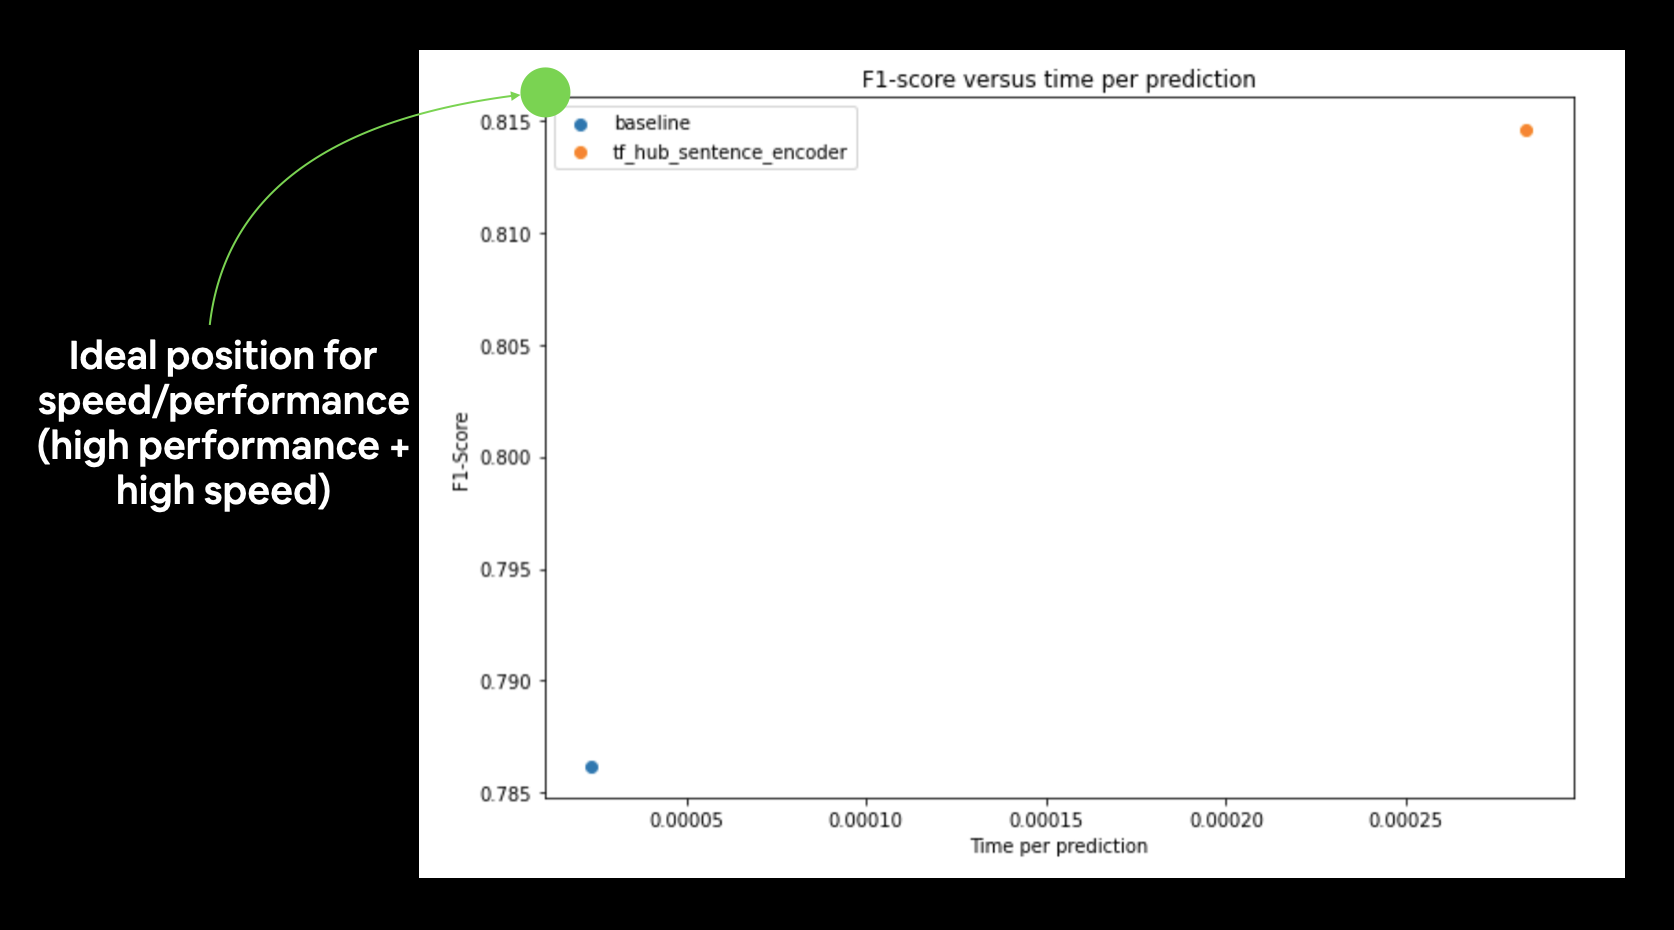